<a href="https://colab.research.google.com/github/Tharun71/EDA/blob/main/Copy_of_Copy_of_Copy_of_Haberman_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##****Plotting for Exploratory Data Analysis(EDA)****

# 1. **Basic Terminology**

# **Haberman Dataset**

Dataset : [https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1]



*   Two types of people who had undergone surgery for breast cancer
*   Type 1 survived and Type 2 Died

    Each person is defined by 3 features : 


*   Age of the patient at the time of operation(numerical)
*   Patients year of surgery(year - 1900, numerical)
* Number of positive axillary nodes detected(numerical)
* Survival Status(class attribute)
    

*   1 = The patient survived 5 years or longer
*   2 = The patient died within 5 years


*   **Objective** : Classify new patients whether he/she would survive given the three features.















In [ ]:
from google.colab import files
files = files.upload()

Saving haberman.csv to haberman.csv


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
#Load habermand dataset into pandas dataFrame
haberman = pd.read_csv("haberman.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Data-points and features
print(haberman.shape)

(306, 4)


In [ ]:
#Column names in the dataset
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [ ]:
#How many data points for each class are present? 
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

Haberman dataset is imbalanced as the per the result of the previous code # of patients survived is 221 and the # of patients died is 81.

#**(1.2) 2-D Scatter Plot**#

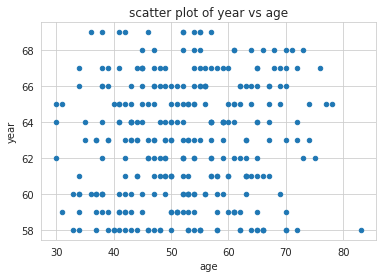

In [ ]:
#2-D Scatter plot
haberman.plot(kind = 'scatter', x = 'age', y = 'year')
plt.title('scatter plot of year vs age')
plt.show()

#no clear separation of points by their class-label

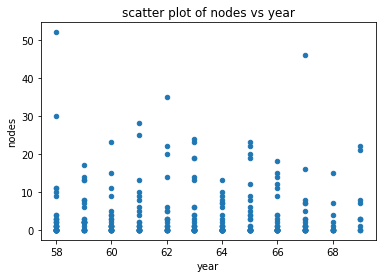

In [ ]:
haberman.plot(kind='scatter', x='year', y='nodes') ;
plt.title('scatter plot of nodes vs year')
plt.show()

#no clear separation of points by their class-label

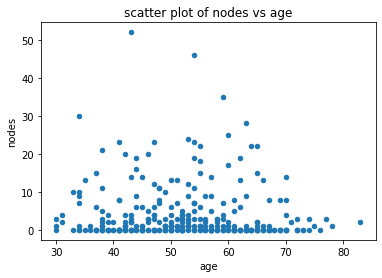

In [ ]:
haberman.plot(kind='scatter', x='age', y='nodes', ) ;
plt.title('scatter plot of nodes vs age')
plt.show()
#no clear separation of points by their class-label

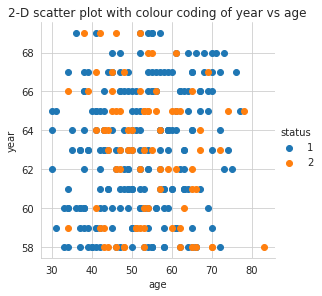

In [ ]:
#2-D scatter plot with colour coding for each patient type/class

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.title('2-D scatter plot with colour coding of year vs age')   
plt.show();

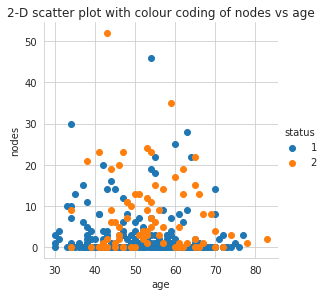

In [ ]:
#2-D scatter plot with colour coding for each patient type/class

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title('2-D scatter plot with colour coding of nodes vs age')   
plt.show();

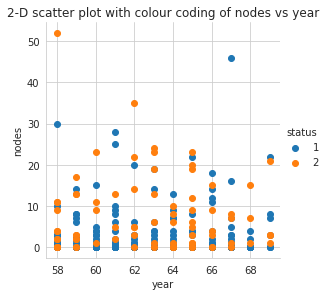

In [ ]:
#2-D scatter plot with colour coding for each patient type/class

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.title('2-D scatter plot with colour coding of nodes vs year')   
plt.show();

####**Observations**####

*   By plotting age on the x-axis and year on the y-axis we do not see any groups.
*   But we could see some groups by using age and nodes but not very clear as they overlap.



#**(1.3) Pair Plots**

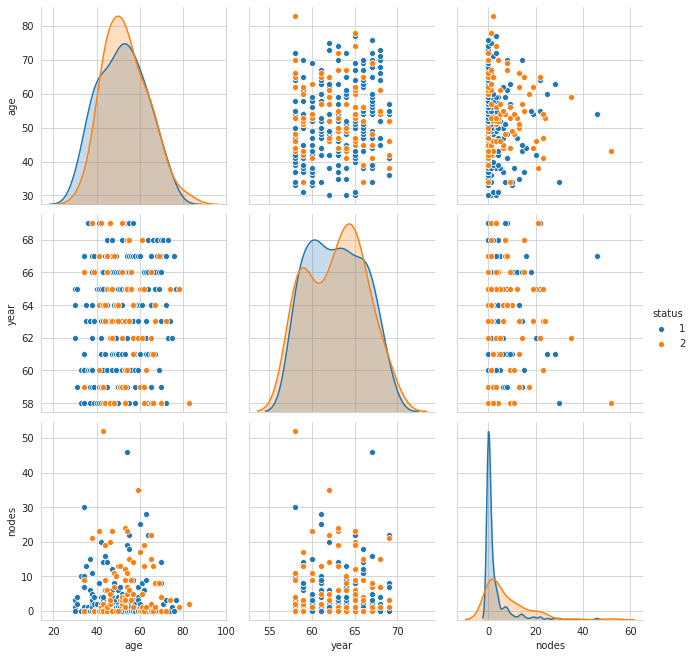

In [ ]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", height=3);
plt.show()

####**Observations**####


*   Based on the pair plot we can see that using age and year the points are highly overlapped.
*   Overlaps are less with two classes based on nodes
* We can use "if-else" conditions to build a simple model to classify the patient types.



#**(1.4) Histogram, PDF and CDF**#

In [ ]:
haberman_status_1=haberman.loc[haberman["status"]==1];
haberman_status_2=haberman.loc[haberman["status"]==2];

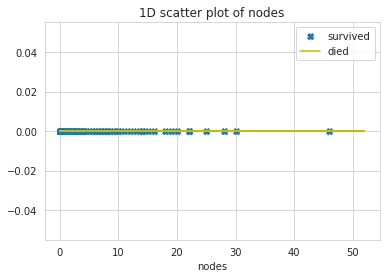

In [ ]:
import numpy as np

haberman_survived = haberman.loc[haberman["status"] == 1];
haberman_died = haberman.loc[haberman["status"] == 2];

plt.plot(haberman_survived["nodes"], np.zeros_like(haberman_survived['nodes']), 'X', label='survived')
plt.plot(haberman_died["nodes"], np.zeros_like(haberman_died['nodes']), 'Y', label='died')
plt.xlabel('nodes')
plt.title('1D scatter plot of nodes')
plt.legend()

plt.show()

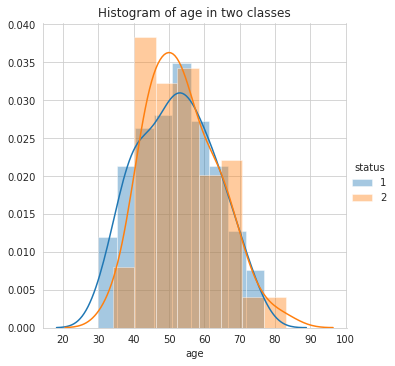

In [ ]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('Histogram of age in two classes')
plt.show();

####**Observations**####

*   This Histogram overlaps each other.
*   It is observed that patients age within 40-60 are more likely to die.
* People less than of age 40 are likely to survive.



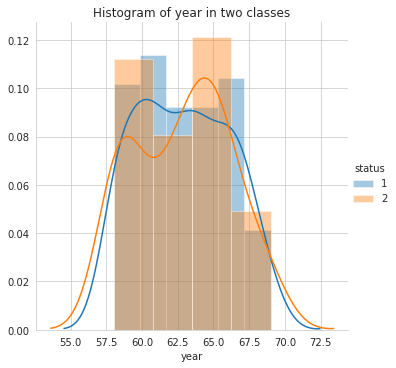

In [ ]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title('Histogram of year in two classes')
plt.show();

####**Observations**####


*   In this histohram patients within age of 60-65 died after operation
*   Again we can see there is considerable overallping on the classes.



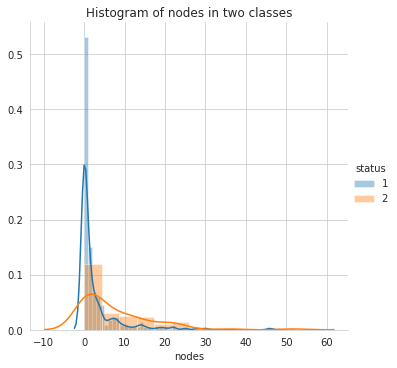

In [ ]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title('Histogram of nodes in two classes')
plt.show();

####**Observations**####


*   We can see partially overlap among classes
*   Patients having 0 axil nodes survive.



[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


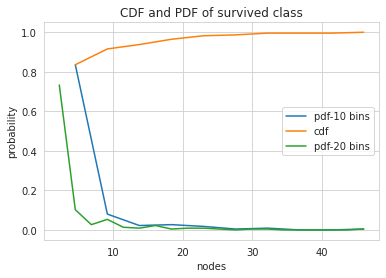

In [ ]:
#Plot CDF of nodes for survived

counts, bin_edges = np.histogram(haberman_survived['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf-10 bins');
plt.plot(bin_edges[1:], cdf, label='cdf')


counts, bin_edges = np.histogram(haberman_survived['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf, label='pdf-20 bins');
plt.title('CDF and PDF of survived class')
plt.xlabel('nodes')
plt.ylabel('probability')
plt.legend()
plt.show();

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


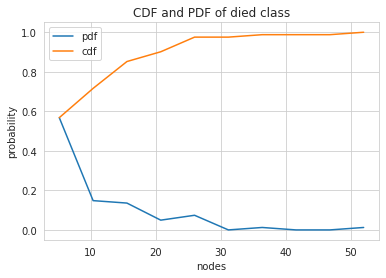

In [ ]:
#Plot CDF of nodes for died

counts, bin_edges = np.histogram(haberman_died['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf')
plt.plot(bin_edges[1:], cdf, label='cdf')

plt.title('CDF and PDF of died class')
plt.xlabel('nodes')
plt.ylabel('probability')
plt.legend()

plt.show();

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


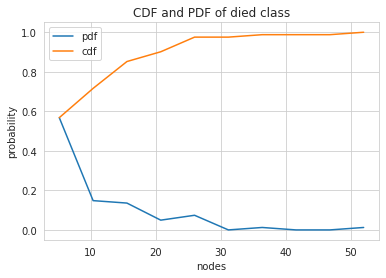

In [ ]:
counts, bin_edges = np.histogram(haberman_died['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf')
plt.plot(bin_edges[1:], cdf, label='cdf')

plt.title('CDF and PDF of died class')
plt.xlabel('nodes')
plt.ylabel('probability')
plt.legend()

plt.show();

#**(1.5) Mean, Variance and Std-dev**#

In [ ]:
#Mean, variance and Std-deviation
print("Means:")
print(np.mean(haberman_survived["nodes"]))
#Mean with an outlier
print(np.mean(np.append(haberman_survived["nodes"],50)));

print(np.mean(haberman_died["nodes"]))

print("\nStd-dev:");
print(np.std(haberman_survived["nodes"]))
print(np.std(haberman_died["nodes"]))

Means:
2.7911111111111113
3.0
7.45679012345679

Std-dev:
5.857258449412131
9.128776076761632


#**(3.6) Median, Percentile, Quantile, IQR, MAD**#

In [ ]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(haberman_survived["nodes"]))

print(np.median(haberman_died["nodes"]))



print("\nQuantiles:")
print(np.percentile(haberman_survived["nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman_died["nodes"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(haberman_survived["nodes"],90))
print(np.percentile(haberman_died["nodes"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_survived["nodes"]))
print(robust.mad(haberman_died["nodes"]))


Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


#**(3.7) Box plot and Whiskers**#

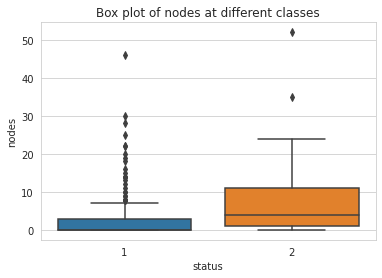

In [ ]:
#Box plot with whiskers
sns.boxplot(x='status',y='nodes', data=haberman)
plt.title('Box plot of nodes at different classes')
plt.show()

#**(3.8) Violin plots**#

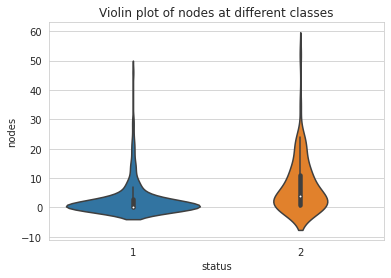

In [ ]:
sns.violinplot(x="status", y="nodes", data=haberman, size=10)
plt.title('Violin plot of nodes at different classes')
plt.show()

#**(3.9) Multivariate probability density, contour plot**#

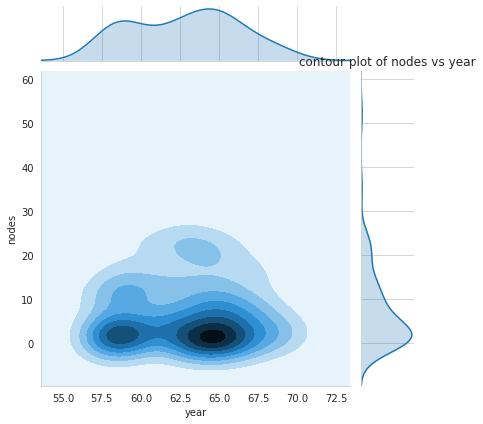

In [ ]:
#2D Density plot, contors-plot
sns.jointplot(x="year", y="nodes", data=haberman_died, kind="kde");
plt.title('contour plot of nodes vs year')
plt.show();

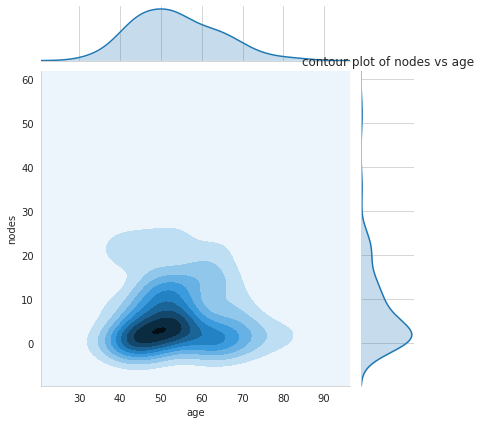

In [ ]:
#2D Density plot, contors-plot
sns.jointplot(x="age", y="nodes", data=haberman_died, kind="kde");
plt.title('contour plot of nodes vs age')
plt.show();

#**Summarizing plots in English**#


*   As per the overall observation patients age below 35 are more likely to survive.
*   The data-points for both classes are not equal and this dataset is found to be imbalanced, no clear way to differentiate the classes based on the three features.
* Class 2 is more spread and the dead patients had nodes in a wide range(Box plot and Violin plot).
* Again as per Box plot and Violin plot most of the people who survived had 1-10 nodes as the class 1 is more dense in terms of nodes.

